# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data you are referring to comes from 17 marketing campaigns conducted by a Portuguese bank between May 2008 and November 2010. Here’s a summary based on the information provided:

- **Number of Campaigns**: 17 marketing campaigns.
- **Total Contacts**: 79,354 contacts.
- **Successes**: 6,499 successful applications (with an 8% success rate).

Each campaign involved multiple contact attributes and results were integrated across various channels including phone and, occasionally, online banking.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# Check the number of missing values in each column
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# Check for unique values in each column  
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [7]:
# check number of records where the value is equal to 0
df.eq(0).sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

#### Business Objective

The primary business objective of this task is to **predict whether a client will subscribe to a term deposit** based on their personal, financial, and contact information. This predictive modeling aims to assist the Portuguese bank in identifying potential clients who are more likely to be interested in and subsequently subscribe to the bank's term deposit product. By leveraging historical marketing campaign data, the goal is to improve the efficiency and effectiveness of future marketing efforts, enhance targeting strategies, and ultimately increase the rate of successful subscriptions. This will help the bank to optimize marketing resources, reduce costs associated with less effective campaigns, and increase overall profitability.

In [12]:
# Rename a column
df.rename(columns={'y': 'subscribed'}, inplace=True)

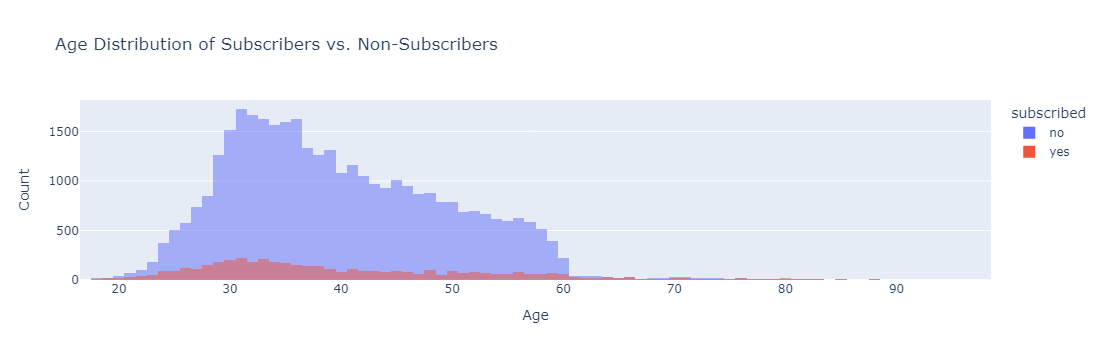

In [13]:
# Create a histogram to compare the age distribution of subscribers and non-subscribers
fig = px.histogram(df, x='age', color='subscribed', barmode='overlay', title='Age Distribution of Subscribers vs. Non-Subscribers')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

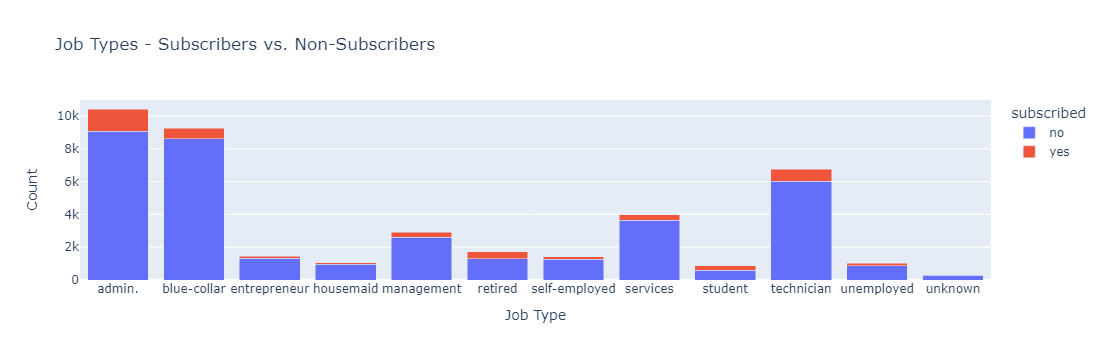

In [14]:
# Count the number of subscribers and non-subscribers for each job type
job_counts = df.groupby(['job', 'subscribed']).size().reset_index(name='count')

# Create a stacked bar chart to compare job types among subscribers and non-subscribers
fig = px.bar(job_counts, x='job', y='count', color='subscribed', barmode='stack',
             title='Job Types - Subscribers vs. Non-Subscribers')
fig.update_layout(xaxis_title='Job Type', yaxis_title='Count')
fig.show()

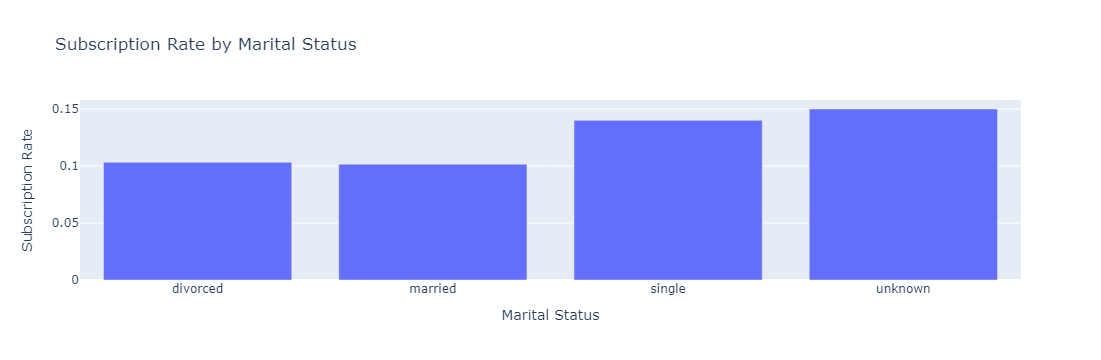

In [15]:
# Calculate the subscription rate for each marital status
marital_rates = df.groupby(['marital', 'subscribed']).size().unstack().reset_index()
marital_rates['subscription_rate'] = marital_rates['yes'] / (marital_rates['yes'] + marital_rates['no'])

# Create a bar chart to compare subscription rates among different marital statuses
fig = px.bar(marital_rates, x='marital', y='subscription_rate',
             title='Subscription Rate by Marital Status')
fig.update_layout(xaxis_title='Marital Status', yaxis_title='Subscription Rate')
fig.show()

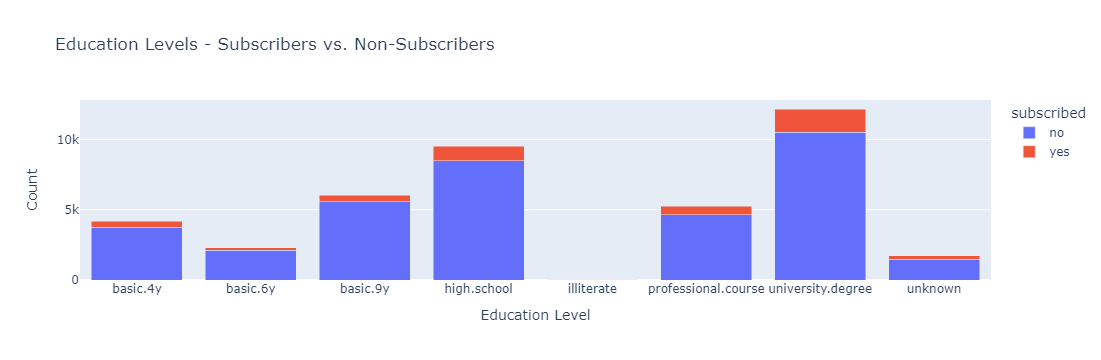

In [16]:
# Count the number of subscribers and non-subscribers for each education level
education_counts = df.groupby(['education', 'subscribed']).size().reset_index(name='count')

# Create a stacked bar chart to compare education levels among subscribers and non-subscribers
fig = px.bar(education_counts, x='education', y='count', color='subscribed', barmode='stack',
             title='Education Levels - Subscribers vs. Non-Subscribers')
fig.update_layout(xaxis_title='Education Level', yaxis_title='Count')
fig.show()

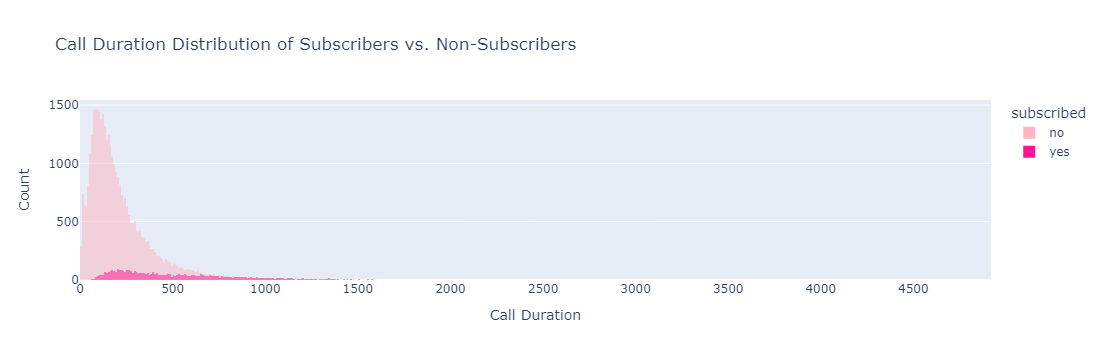

In [17]:
# Create a histogram with call duration
fig = px.histogram(df, x='duration', color='subscribed', barmode='overlay',
                   title='Call Duration Distribution of Subscribers vs. Non-Subscribers',
                   color_discrete_sequence=['lightpink', 'deeppink'])
fig.update_layout(xaxis_title='Call Duration', yaxis_title='Count')
fig.show()

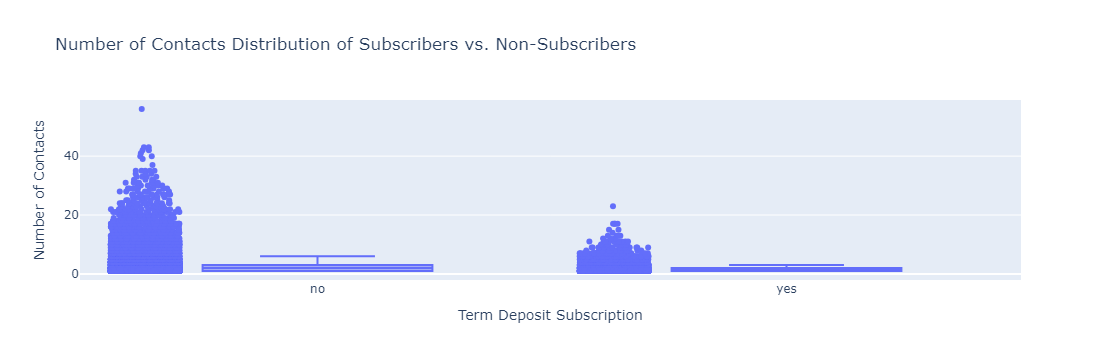

In [18]:
# Create a box plot to compare the number of contacts distribution of subscribers and non-subscribers
fig = px.box(df, x='subscribed', y='campaign', points='all',
             title='Number of Contacts Distribution of Subscribers vs. Non-Subscribers')
fig.update_layout(xaxis_title='Term Deposit Subscription', yaxis_title='Number of Contacts')
fig.show()

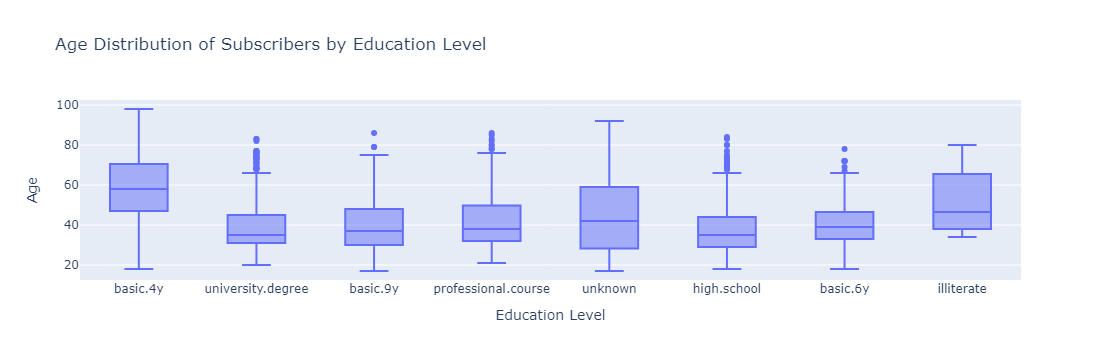

In [19]:
# Create a box plot to compare the age distribution of subscribers based on education level
fig = px.box(df[df['subscribed'] == 'yes'], x='education', y='age',
             title='Age Distribution of Subscribers by Education Level')
fig.update_layout(xaxis_title='Education Level', yaxis_title='Age')
fig.show()

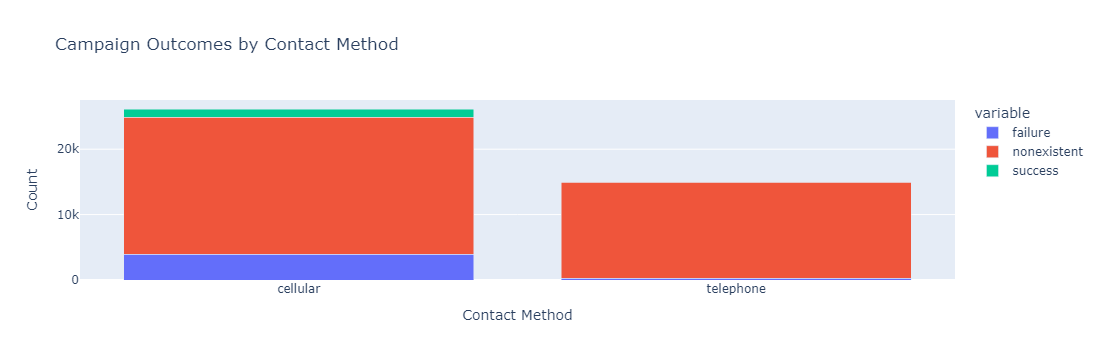

In [20]:
# Count the number of campaign outcomes for each contact method
outcome_counts = df.groupby(['contact', 'poutcome']).size().unstack().reset_index()

# Create stacked bar charts to compare campaign outcomes based on contact methods
fig = px.bar(outcome_counts, x='contact', y=['failure', 'nonexistent', 'success'],
             barmode='stack', title='Campaign Outcomes by Contact Method')
fig.update_layout(xaxis_title='Contact Method', yaxis_title='Count')
fig.show()

### Business Conclusions and Recommendations

**Age Distribution**
- **Conclusion**: Age significantly influences the likelihood of subscribing to a term deposit. Subscribers and non-subscribers differ in their age distribution.
- **Recommendation**: Implement targeted marketing campaigns focusing on age groups that exhibit higher subscription rates. Tailor your messaging to these demographics and use age-specific marketing strategies to enhance engagement.

**Job Types**
- **Conclusion**: The type of job a client has impacts their subscription likelihood. Certain job types show a higher subscription rate.
- **Recommendation**: Personalize marketing efforts by targeting job types with higher subscription rates. Craft offers and messages that resonate with specific occupations or industries to improve conversion rates.

**Marital Status**
- **Conclusion**: Marital status affects the subscription rate. Subscribers differ from non-subscribers in terms of marital status.
- **Recommendation**: Customize marketing strategies based on marital status. Develop targeted messaging for married, single, divorced, and widowed clients, and adjust your approach to align with their preferences.

**Education Levels**
- **Conclusion**: Education level influences subscription rates, with certain education backgrounds showing higher subscription tendencies.
- **Recommendation**: Target marketing campaigns based on education levels. Focus on educational backgrounds that demonstrate higher subscription rates and tailor your offers to these groups.

**Call Duration**
- **Conclusion**: The duration of a call impacts the likelihood of subscription. Optimal call duration correlates with higher success rates.
- **Recommendation**: Train call center agents on effective communication techniques and optimal call durations. Implement guidelines to improve engagement and conversion rates.

**Number of Contacts**
- **Conclusion**: The number of contacts made during a campaign affects subscription rates. Finding the balance between persistence and excessive contact is crucial.
- **Recommendation**: Develop targeted contact strategies that balance persistence with customer satisfaction. Adjust contact frequency and timing to enhance subscription rates.  

**Distribution of Age by Education Level**
- **Conclusion**: Age distribution varies across different education levels among subscribers.
- **Recommendation**: Target age groups within specific education categories. Customize marketing messages to address age-related preferences within each education level.

These conclusions and recommendations provide actionable insights for optimizing marketing strategies, improving client engagement, and increasing subscription rates.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

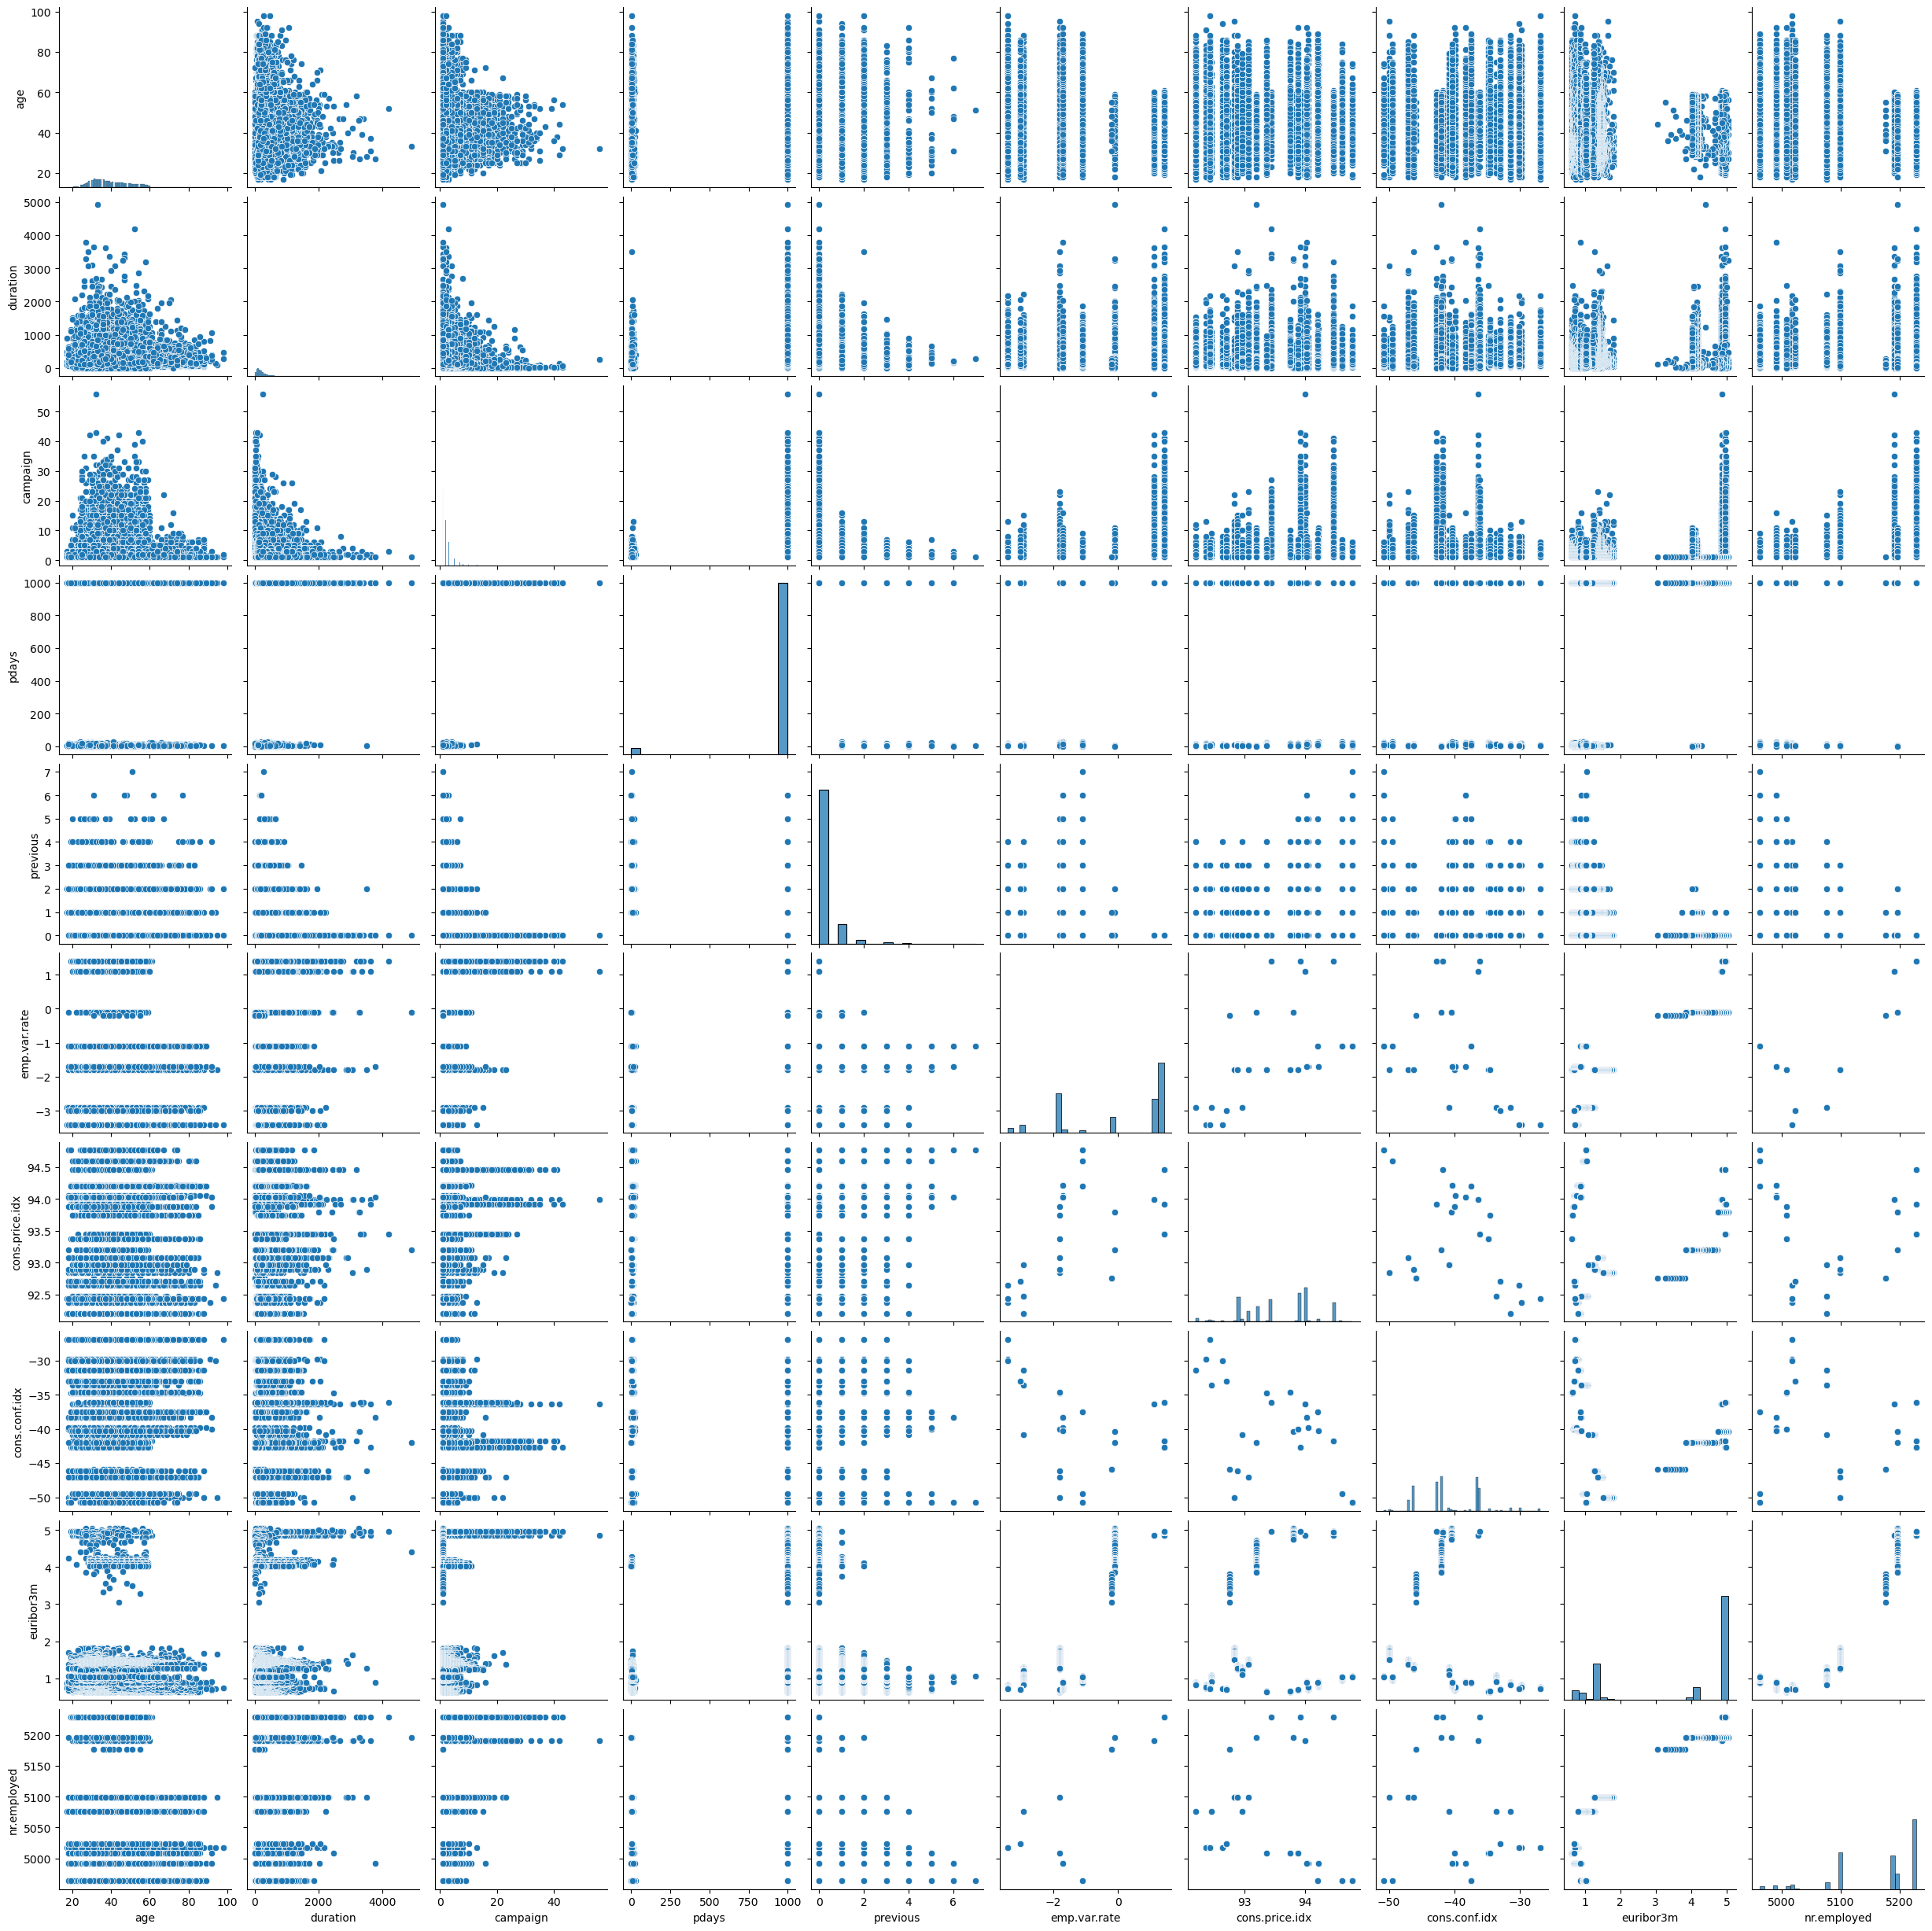

In [23]:
sns.pairplot(df)

In [24]:
# Converting the datatype to best possilble datatypes
data = df.convert_dtypes()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  Int64  
 1   job             41188 non-null  string 
 2   marital         41188 non-null  string 
 3   education       41188 non-null  string 
 4   default         41188 non-null  string 
 5   housing         41188 non-null  string 
 6   loan            41188 non-null  string 
 7   contact         41188 non-null  string 
 8   month           41188 non-null  string 
 9   day_of_week     41188 non-null  string 
 10  duration        41188 non-null  Int64  
 11  campaign        41188 non-null  Int64  
 12  pdays           41188 non-null  Int64  
 13  previous        41188 non-null  Int64  
 14  poutcome        41188 non-null  string 
 15  emp.var.rate    41188 non-null  Float64
 16  cons.price.idx  41188 non-null  Float64
 17  cons.conf.idx   41188 non-null 

In [26]:
# previous column has 35563 values = 0, dropping the column
data.drop('previous', axis=1, inplace=True)

In [27]:
col = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','subscribed']

In [28]:
data_r = data[col]
data_r

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

      subscribed  
0             no  
1             no  
2             no  
3             no  
4             no  
...          ...  
41183        yes  
41184         no  
41185         no  
41186        yes  
41187         no  

[41188 rows x 8 columns]

In [29]:
# create categorical variables
df1 = pd.get_dummies(data_r, columns=["job","marital","education","default","housing","loan"])
df1.head()

age subscribed  job_admin.  job_blue-collar  job_entrepreneur  \
0   56         no       False            False             False   
1   57         no       False            False             False   
2   37         no       False            False             False   
3   40         no        True            False             False   
4   56         no       False            False             False   

   job_housemaid  job_management  job_retired  job_self-employed  \
0           True           False        False              False   
1          False           False        False              False   
2          False           False        False              False   
3          False           False        False              False   
4          False           False        False              False   

   job_services  ...  education_unknown  default_no  default_unknown  \
0         False  ...              False        True            False   
1          True  ...              False       False             True   
2          True  ...              False        True            False   
3         False  ...              False        True            False   
4          True  ...              False        True            False   

   default_yes  housing_no  housing_unknown  housing_yes  loan_no  \
0        False        True            False        False     True   
1        False        True            False        False     True   
2        False       False            False         True     True   
3        False        True            False        False     True   
4        False        True            False        False    False   

   loan_unknown  loan_yes  
0         False     False  
1         False     False  
2         False     False  
3         False     False  
4         False      True  

[5 rows x 35 columns]

In [30]:
df1.columns

Index(['age', 'subscribed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes'],
      dtype='object')

In [31]:
X = df1.drop(columns=['subscribed'])
y = df1['subscribed']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')  # You can also use 'stratified' or 'uniform'

# Step 2: Train the classifier
dummy_clf.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_dummy = dummy_clf.predict(X_test)

# Step 4: Evaluate performance
baseline_score = accuracy_score(y_test, y_pred_dummy)

# Step 5: Evaluate performance
print("Baseline Model Score is %2.3f" % baseline_score)

Baseline Model Score is 0.887


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from time import time

# Step 1: Initialize the model
log_reg = LogisticRegression()  # Increase max_iter if needed for convergence
start_time = time()

# Step 2: Train the model
log_reg.fit(X_train, y_train)
log_train_time = time() - start_time
log_train_score = log_reg.score(X_train, y_train)  # Train score
log_test_score = log_reg.score(X_test, y_test)    # Test score

print(f"Train Score (Accuracy): {log_train_score:.4f}")
print(f"Test Score (Accuracy): {log_test_score:.4f}")
print(f"Training Time: {log_train_time:.4f} seconds")

Train Score (Accuracy): 0.8876
Test Score (Accuracy): 0.8865
Training Time: 0.3812 seconds


### Problem 9: Score the Model

What is the accuracy of your model?

### K-Nearest Neighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

start_time = time()
model.fit(X_train, y_train)
knn_train_time = time() - start_time

knn_train_score = model.score(X_train, y_train)  # Train score
knn_test_score = model.score(X_test, y_test)    # Test score

print(f"Train Score (Accuracy): {knn_train_score:.4f}")
print(f"Test Score (Accuracy): {knn_test_score:.4f}")
print(f"Training Time: {knn_train_time:.4f} seconds")

Train Score (Accuracy): 0.8900
Test Score (Accuracy): 0.8735
Training Time: 0.0527 seconds


### Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

start_time = time()
model.fit(X_train, y_train)
dtc_train_time = time() - start_time

dtc_train_score = model.score(X_train, y_train)  # Train score
dtc_test_score = model.score(X_test, y_test)    # Test score

print(f"Train Score (Accuracy): {dtc_train_score:.4f}")
print(f"Test Score (Accuracy): {dtc_test_score:.4f}")
print(f"Training Time: {dtc_train_time:.4f} seconds")

Train Score (Accuracy): 0.9166
Test Score (Accuracy): 0.8610
Training Time: 0.1869 seconds


### Support Vector Machine (SVM) Classifier

In [44]:
from sklearn.svm import SVC
model = SVC()

start_time = time()
model.fit(X_train, y_train)
svm_train_time = time() - start_time

svm_train_score = model.score(X_train, y_train)  # Train score
svm_test_score = model.score(X_test, y_test)    # Test score

print(f"Train Score (Accuracy): {svm_train_score:.4f}")
print(f"Test Score (Accuracy): {svm_test_score:.4f}")
print(f"Training Time: {svm_train_time:.4f} seconds")

Train Score (Accuracy): 0.8876
Test Score (Accuracy): 0.8865
Training Time: 17.6400 seconds


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [46]:
results = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'SVM'],
    'Train Time': [log_train_time, knn_train_time, dtc_train_time, svm_train_time],
    'Train Accuracy': [log_train_score, knn_train_score, dtc_train_score, svm_train_score],
    'Test Accuracy': [log_test_score, knn_test_score, dtc_test_score, svm_test_score]
}

# Create DataFrame
df_results = pd.DataFrame(results)

# Display DataFrame
print(df_results)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.381242        0.887557       0.886502
1  K-Nearest Neighbors    0.052704        0.890015       0.873513
2        Decision Tree    0.186926        0.916601       0.861010
3                  SVM   17.639997        0.887557       0.886502


In [47]:
df_results

Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.381242        0.887557       0.886502
1  K-Nearest Neighbors    0.052704        0.890015       0.873513
2        Decision Tree    0.186926        0.916601       0.861010
3                  SVM   17.639997        0.887557       0.886502

### Key Observations:
- **Train Time:**
  - SVM is significantly slower compared to the other models, with a training time of 17.64 seconds. Logistic Regression, KNN, and Decision Tree are much faster, with KNN being the quickest at 0.053 seconds.
  
- **Train Accuracy:**
  - The Decision Tree model has the highest training accuracy (0.9166), which could indicate potential overfitting since it also shows the lowest test accuracy (0.8610).
  
- **Test Accuracy:**
  - Logistic Regression and SVM have the same test accuracy (0.8865), while KNN and Decision Tree perform slightly worse on the test set. KNN achieves a test accuracy of 0.8735, and the Decision Tree has the lowest test accuracy (0.8610).

### Summary:
- **Best Accuracy**: Logistic Regression and SVM achieve the best test accuracy, but Logistic Regression is much faster to train than SVM, making it a more practical choice.
- **Overfitting**: The Decision Tree has a high training accuracy but a significant drop in test accuracy, suggesting it might be overfitting to the training data.
- **Training Time Efficiency**: KNN has the shortest training time but slightly lower test accuracy compared to Logistic Regression and SVM.

Based on this comparison, Logistic Regression provides a good balance of training speed and accuracy on both training and test sets.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Hyperparameter Tuning**

In [51]:
# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear'],
        'max_iter': [500,1000,2000], 
        'tol': [1e-4, 1e-3, 1e-2], 
        'penalty':['l1','l2']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear','rbf'],
   }
}
default_models = {
    "Logistic Regression":LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),        
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

**Grid search with Cross-Validation**

In [53]:
from sklearn.model_selection import GridSearchCV

# Perform Grid Search with Cross-Validation
best_models = {}
for model_name, model in default_models.items():
    print(f"\nPerforming Grid Search for {model_name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")


Performing Grid Search for Logistic Regression
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
Best cross-validation score for Logistic Regression: 0.887587253414264

Performing Grid Search for K-Nearest Neighbors
Best parameters for K-Nearest Neighbors: {'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation score for K-Nearest Neighbors: 0.8850075872534143

Performing Grid Search for Support Vector Machine
Best parameters for Support Vector Machine: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score for Support Vector Machine: 0.8876176024279211

Performing Grid Search for Decision Tree
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation score for Decision Tree: 0.8864339908952958


In [57]:
import time

def evaluateModels(models):
   results = {}
   # Train and evaluate the models
   for model_name, model in models.items():
      # Measure training time
      start_time = time.time()
      model.fit(X_train, y_train)
      end_time = time.time()
      y_pred_train = model.predict(X_train)
      y_pred_test = model.predict(X_test)

      # Evaluate the model
      accuracy_train = accuracy_score(y_train, y_pred_train)
      accuracy_test = accuracy_score(y_test, y_pred_test)

        
      # Store the results
      results[model_name] = {
        'Train Time': end_time - start_time,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
      }

   # Display the results
   results_df = pd.DataFrame(results).T
   print(results_df)
evaluateModels(best_models)

                        Train Time  Train Accuracy  Test Accuracy
Logistic Regression       0.077877        0.887557       0.886502
K-Nearest Neighbors       0.047034        0.890349       0.883952
Support Vector Machine   68.118582        0.887587       0.886380
Decision Tree             0.087841        0.891290       0.884438


### Key Observations (Hypertuned Models):
- **Train Time:**
  - After hypertuning, training times for all models remain relatively efficient except for **Support Vector Machine**, which sees a large increase in train time (from 17.64s to 68.12s).
  
- **Train Accuracy:**
  - Logistic Regression and Support Vector Machine maintain similar train accuracies after tuning.
  - **K-Nearest Neighbors** and **Decision Tree** show slight improvements in train accuracy after tuning. The Decision Tree's train accuracy dropped slightly, likely reducing overfitting.

- **Test Accuracy:**
  - **K-Nearest Neighbors** and **Decision Tree** see improvements in test accuracy after hypertuning. KNN improves from 0.8735 to 0.8840, and Decision Tree improves from 0.8610 to 0.8844.
  - Logistic Regression and SVM show no significant change in test accuracy, maintaining their strong performance.
  
### Conclusion:
- **Best Model Performance**: Both **Logistic Regression** and **Support Vector Machine** provide the highest test accuracy (0.8865 and 0.8864, respectively), with Logistic Regression being much faster to train after tuning (0.078s vs. 68.119s for SVM). Thus, Logistic Regression remains the most efficient choice.
  
- **Improvements After Tuning**: 
  - The hypertuning process improved the performance of K-Nearest Neighbors and Decision Tree models. **K-Nearest Neighbors** achieved a notable improvement in test accuracy, making it more competitive.
  - **Decision Tree** saw a significant reduction in overfitting, with test accuracy improving by a notable margin (from 0.8610 to 0.8844).

- **Recommendation**: For practical use, **Logistic Regression** remains the best overall choice due to its speed and accuracy. However, **K-Nearest Neighbors** is now a close competitor after hypertuning, offering a balance between train time and test accuracy. **Support Vector Machine**, while accurate, is computationally expensive, making it less ideal unless accuracy is prioritized over training time.

### Future Work  
To further improve the model:

- Explore more advanced feature engineering techniques.
- Utilize ensemble methods like Random Forest or Gradient Boosting.
- Regularly update the model with new data to maintain its accuracy.
   
By following these steps, the bank can leverage data-driven insights to enhance their marketing strategies and improve client acquisition.